### **How to Find the Optimal Number of Clusters Effectively**

#### **Table of Content:**

1. Introduction to K-Means Clustering

2. Using Elbow Diagram to Find K-Value
3. Silhouette Score to Find K-Value

##### **1. Introduction to K-Means Clustering**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings

np.random.seed(42)
warnings.warn('ignore')

C:\Users\faizan\AppData\Local\Temp/ipykernel_29304/418133491.py:6: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

In [4]:
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("x1", fontsize=12)
    plt.ylabel("x2", fontsize=12, rotation=0)

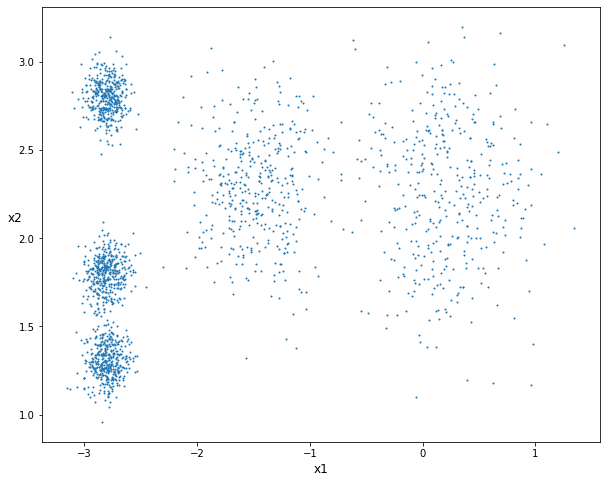

In [6]:
plt.figure(figsize=(10, 8))
plot_clusters(X)
plt.show()

We can clearly observe 5 clusters of instances. The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

Let's train a K-Means clustering algorithm on this dataset. It will try to find each blob's center and assign each instance to the closest blob using the code below:

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 5

In [9]:
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters k that the algorithm must find. 

For this dataset, it is pretty obvious from looking at the data that k should be set to 5, but in general, it is not that easy and require a lot of work to do it effectively. 

Let's take a look at the cluster label for each data point and also the centroids for each cluster:

In [10]:
y , y_pred

(array([4, 2, 0, ..., 3, 0, 2]), array([4, 0, 1, ..., 2, 1, 0]))

In [11]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

This shows the dimensions of the centroids for each cluster.


Let's now plot the clusters using the plotting functions below :

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [13]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
        
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [14]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),np.linspace(mins[1], maxs[1], resolution))
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),cmap="Pastel2")

    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("x1", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("x2", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(12, 8))
    plt.subplot(121)

    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)

    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    
    if title2:
        plt.title(title2, fontsize=14)

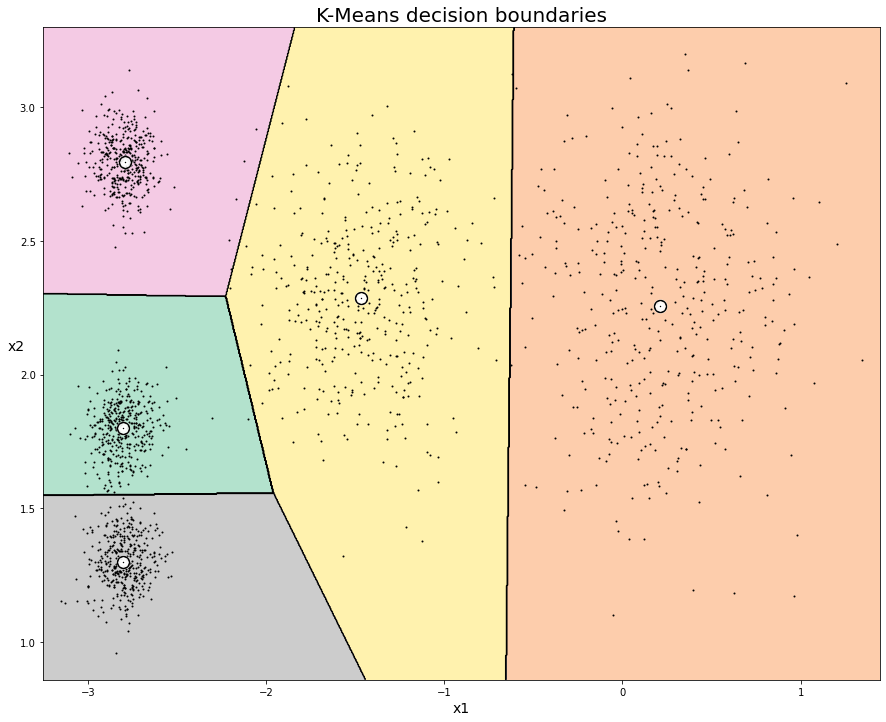

In [16]:
plt.figure(figsize=(15, 12))
plot_decision_boundaries(kmeans, X)
plt.title('K-Means decision boundaries', fontsize=20)
plt.show()

As you can see, we have set the number of clusters to 5, as it is really obvious by only looking at the data. 



However, in general, it will not be that obvious, and if we choose the wrong value of K, it will result in a very bad clustering model. 

Consider this example if we chose lower or higher values of K, it will lead to very wrong clustering of the data, as seen in figure 3.

In [17]:
k3means = KMeans(n_clusters=3)
k8means = KMeans(n_clusters=8)

<Figure size 1080x864 with 0 Axes>

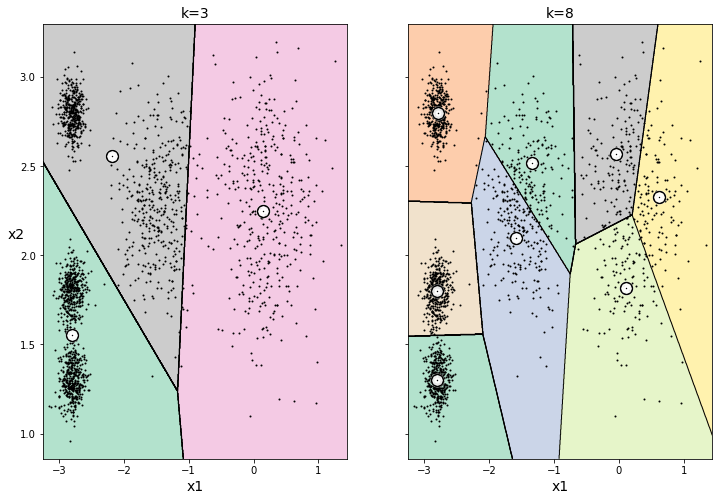

In [18]:
plt.figure(figsize=(15, 12))
plot_clusterer_comparison(k3means, k8means, X, "k=3", "k=8")
plt.show()

As you can see that choosing lower values for K (in this case, 3) will lead to assigning data to the wrong clusters, as shown in Figure (left). 

While choosing a higher value of K will lead to dividing the same cluster into smaller clusters, as can be seen in Figure (right). 


Therefore, it is important to find a way to estimate the best value of K that will avoid both under and overestimation of its value, as in both cases, it will lead to bad clustering models.

 

We will discuss two methods to find the best value of K : 

**Elbow Diagram** and the **Silhouette Coefficient**.

##### **2. Using Elbow Diagram to Find K-Value**

The below diagram is based on calculating the interia for each value of k and plotting it. 

The interia is the "*mean squared distance between each instance and its closest centroid*". 

So as the more the data points are near to the centroids, the smaller the interia will be. 

However, there is one drawback to depending only on this measurement is that as the number of clusters increases the interia will decrease, and here comes the importance of the elbow diagram as we can select the most appropriate value of K.

Let's first draw the elbow diagram using the code below:

In [19]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(1, 10)]

c:\Users\faizan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [20]:
inertias = [model.inertia_ for model in kmeans_per_k]

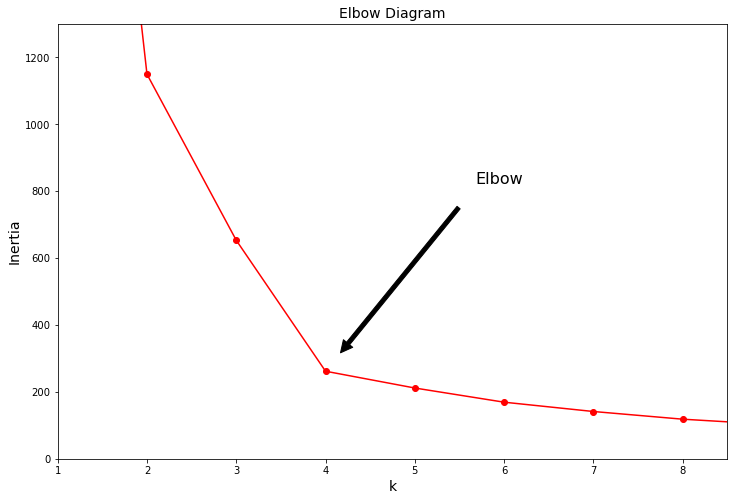

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "ro-")

plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.axis([1, 8.5, 0, 1300])
plt.title('Elbow Diagram', fontsize=14)
plt.show()

As we can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k.  

This curve has roughly the shape of an arm, and there is an "elbow" at k=4, so if we did not know better, it would be a good choice for the value of K : any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no important reason.

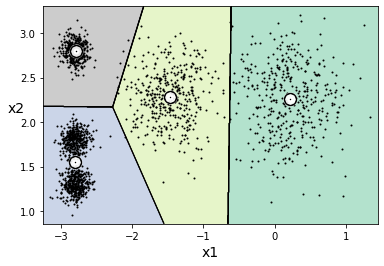

In [22]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

However, sometimes it can get confusing sometimes. Is it 4, 5, or 6, that we should take as the optimal number of clusters? 

Also, it is not as accurate as in this example, we know that the best value for K is 5 however, the best value estimated is 4 from this elbow diagram. 

A more precise approach (but also more computationally expensive) is to use the silhouette score.

##### **3. Silhoutte Score to find K-value**

The Silhouette score is the "*mean silhouette coefficient over all the instances.*"

An instance's silhouette coefficient is equal to "**(b - a) / max(a, b)**" where : 

- "a" is the *mean distance to the other instances in the same cluster* (it is the mean intra-cluster distance)

- "b" is the mean nearest-cluster distance, that is the *mean distance to the instances of the next closest cluster* (defined as the one that minimizes b, excluding the instance's own cluster).


The silhouette coefficient can vary between **-1 and +1** : 

a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. 

 To compute the silhouette score, you can use Scikit-Learn's "**silhouette_score()**" function, giving it all the instances in the dataset and the labels they were assigned:

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

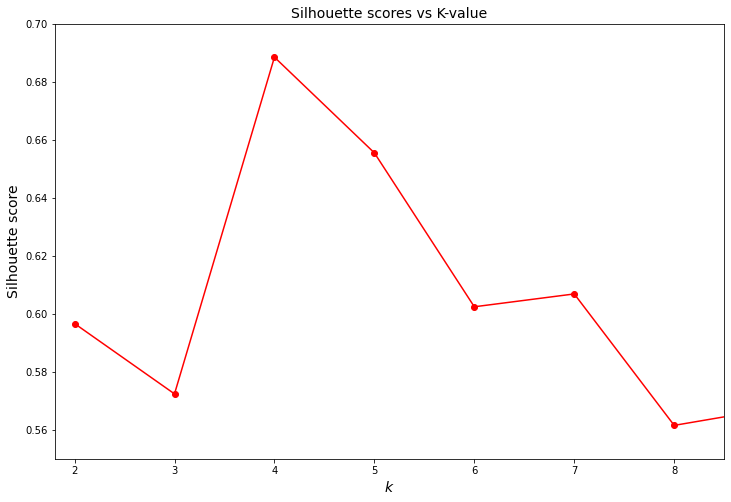

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), silhouette_scores, "ro-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.axis([1.8, 8.5, 0.55, 0.7])
plt.title('Silhouette scores vs K-value', fontsize=14)
plt.show()

As you can see, this visualization is much richer than the elbow diagram. 

Although it confirms that k=4 is a very good choice, it also underlines the fact that k=5 is quite good as well and much better than k=6 or 7. 

This was not visible when comparing inertia values.  


An even more informative visualization is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. 

This is called a "silhouette diagram".

In [25]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

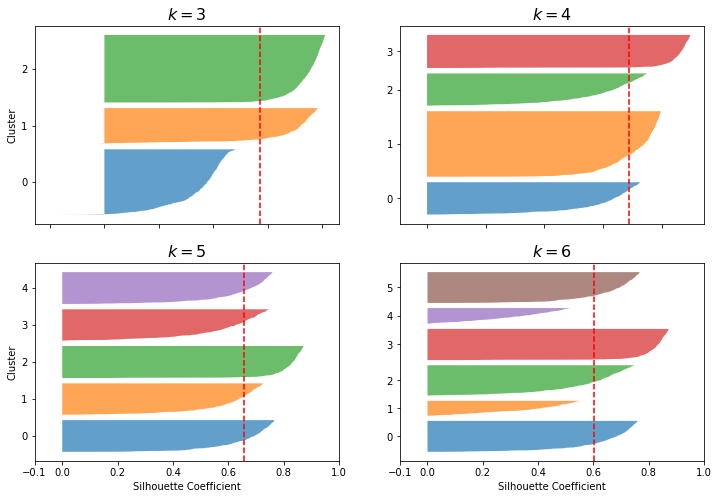

In [26]:
plt.figure(figsize=(12, 8))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)

        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters, the width of each bar represents the size of data for each cluster, and the length of each cluster represents its silhouette coefficient.

When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances bars stopped short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.


We can see that when k=3 and when k=6, we get bad clusters. But when k=4 or k=5, the clusters look pretty good as most instances extend beyond the dashed line to the right and closer to 1.0.  

When k=4, the cluster at index 1 (the third from the top), is rather big, while when k=5, all clusters have similar sizes, so even though the overall silhouette score from k=4 is slightly greater than for k=5, it seems like a good idea to use k=5 to get clusters of similar sizes.